<a href="https://colab.research.google.com/github/ChauNgocHoang/Chau-Ngoc-Hoang/blob/main/tientip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 9.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a12782ed8220261665aeb91942f44a31f0d8970e36aef83cf1fb5dc912bc3600
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


10.408333333333335


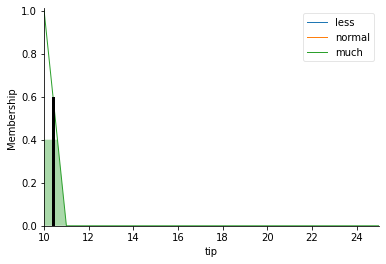

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,20,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,26,1), 'tip')
food ['poor'] = fuzz.trimf(food.universe,[0,0,5])
food ['arange']=  fuzz.trimf(food.universe,[0,5,10])
food ['good']= fuzz.trimf(food.universe,[5,10,10])
service ['poor'] = fuzz.trimf(service.universe,[0,0,5])
service ['arange'] = fuzz.trimf(service.universe,[0,5,10])
service ['good'] = fuzz.trimf(service.universe,[5,10,10])
tip ['less'] = fuzz.trimf(tip.universe,[0,0,5])
tip ['normal'] = fuzz.trimf(tip.universe,[0,5,10])
tip ['much'] = fuzz.trimf(tip.universe,[5,10,10])
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['arange']&service['arange'],tip['normal'])
rule3 = ctrl.Rule(food['good']&service['good'],tip['much'])
rule4 = ctrl.Rule(food['poor']&service['poor'],tip['normal'])
rule5 = ctrl.Rule(food['poor']&service['poor'],tip['much'])
rule6 = ctrl.Rule(food['arange']&service['arange'],tip['less'])
rule7 = ctrl.Rule(food['arange']&service['arange'],tip['much'])
rule8 = ctrl.Rule(food['good']&service['good'],tip['less'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['normal'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 8
tipping.input['service']= 3
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)